In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data2 = pd.read_csv('clean_diabetic_data_2.csv')
data2.drop('Unnamed: 0',axis=1,inplace=True)

In [36]:
data2.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,Unknown,1.0,1.0,1.0,1.0
discharge_disposition_id,25.0,1.0,1.0,1.0,1.0
admission_source_id,1.0,7.0,7.0,7.0,7.0
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [37]:
data2.shape

(101766, 47)

In [38]:
df = data2.copy()

In [39]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
       'level1_diag3', 'level2_diag3', 'med_spec'],
      dtype='object')

In [40]:
df['level1_diag1'] = df['level1_diag1'].astype(str)
df['level2_diag1'] = df['level2_diag1'].astype(str)
df['level1_diag2'] = df['level1_diag2'].astype(str)
df['level2_diag2'] = df['level2_diag2'].astype(str)
df['level1_diag3'] = df['level1_diag3'].astype(str)
df['level2_diag3'] = df['level2_diag3'].astype(str)

In [41]:
df.drop(['level2_diag1','level1_diag2','level2_diag2','level1_diag3','level2_diag3'],axis=1,inplace=True)

In [42]:
x_num = df[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']]
x_cat = df.drop(['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','readmitted'],axis=1)

In [43]:
x_num.shape

(101766, 8)

In [44]:
x_cat.shape

(101766, 33)

In [45]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_num_scaled=scaler.fit_transform(x_num)
x_num_scaled = pd.DataFrame(x_num_scaled)

In [46]:
X = pd.concat((x_num_scaled,x_cat),axis=1)
y = df.readmitted

In [47]:
X.dtypes

0                           float64
1                           float64
2                           float64
3                           float64
4                           float64
5                           float64
6                           float64
7                           float64
race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone                object
acarbose                    

In [48]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first',handle_unknown='error')
enc_x = enc.fit_transform(X)

In [49]:
enc_x.shape

(101766, 470)

In [50]:
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(enc_x, y, test_size = test_size, random_state = seed)

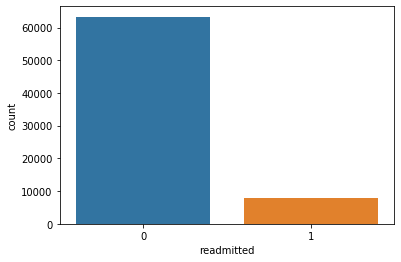

In [53]:
sns.countplot(x=y_train)
plt.show()

In [54]:
# Applying SMOTE for blancing classes
from imblearn.over_sampling import SMOTE
input1 = X_train
output1 = y_train
seed=10
oversample = SMOTE(random_state=seed)
input1,output1 = oversample.fit_resample(input1,output1)
input1.shape

(126604, 470)

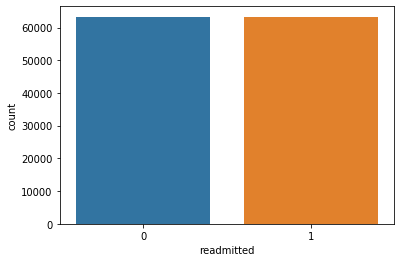

In [55]:
sns.countplot(x=output1)
plt.show()

In [56]:
X_train = input1
y_train = output1

# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
random_forest = RandomForestClassifier()
rfc= random_forest.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [70]:
np.mean(y_test == rfc_pred)

0.8879790370127744

In [71]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
rfc_con_mat = confusion_matrix(y_test,rfc_pred, labels = labels)
print(rfc_con_mat)

[[    6  3417]
 [    3 27104]]


In [72]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = random_forest.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63302
           1       1.00      1.00      1.00     63302

    accuracy                           1.00    126604
   macro avg       1.00      1.00      1.00    126604
weighted avg       1.00      1.00      1.00    126604



In [73]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = random_forest.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27107
           1       0.67      0.00      0.00      3423

    accuracy                           0.89     30530
   macro avg       0.78      0.50      0.47     30530
weighted avg       0.86      0.89      0.84     30530



### Optimization

In [100]:
#incresing n_estimator to reduce overfitting
RFCbest_classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.001,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None,min_samples_leaf=6, min_samples_split=6, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=seed, warm_start=True).fit(X_train,y_train)
RFCpred3=RFCbest_classifier.predict(X_test)

In [101]:
labels = [1, 0]
rfc_con_mat2 = confusion_matrix(y_test,RFCpred3, labels = labels)
print(rfc_con_mat2)


[[  407  3016]
 [ 1904 25203]]


In [102]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = RFCbest_classifier.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     63302
           1       0.92      0.83      0.88     63302

    accuracy                           0.88    126604
   macro avg       0.89      0.88      0.88    126604
weighted avg       0.89      0.88      0.88    126604



In [103]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = RFCbest_classifier.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     27107
           1       0.18      0.12      0.14      3423

    accuracy                           0.84     30530
   macro avg       0.53      0.52      0.53     30530
weighted avg       0.81      0.84      0.82     30530



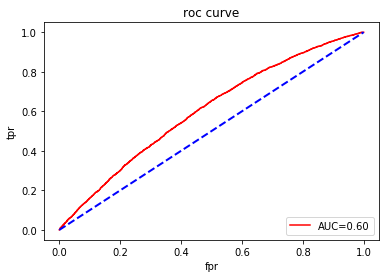

In [104]:
from sklearn.metrics import roc_curve,auc
probs2=RFCbest_classifier.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [ ]:
importances2 =RFCbest_classifier.feature_importances_
print(importances2)

# XGBoost Classifier

In [79]:
from xgboost import XGBClassifier

In [80]:
# fit model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [81]:
y_pred = xgb_model.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
xgb_con_mat = confusion_matrix(y_test,y_pred, labels = labels)
print(xgb_con_mat)

[[   26  3397]
 [   35 27072]]


In [83]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = xgb_model.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     63302
           1       1.00      0.88      0.93     63302

    accuracy                           0.94    126604
   macro avg       0.94      0.94      0.94    126604
weighted avg       0.94      0.94      0.94    126604



In [84]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = xgb_model.predict(X_test.todense())
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27107
           1       0.11      1.00      0.20      3423

    accuracy                           0.11     30530
   macro avg       0.06      0.50      0.10     30530
weighted avg       0.01      0.11      0.02     30530



C:\Users\RISHIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.76%


# Optimisation

In [86]:
xgb_opt = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_depth=10,
              min_child_weight=1,
              n_estimators=500, n_jobs=-1, num_parallel_tree=2,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              validate_parameters=False, verbosity=None)
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=2,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [87]:
y_pred = xgb_opt.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
xgb_con_mat = confusion_matrix(y_test,y_pred, labels = labels)
print(xgb_con_mat)

[[   94  3329]
 [  134 26973]]


In [89]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = xgb_opt.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     63302
           1       1.00      0.89      0.94     63302

    accuracy                           0.94    126604
   macro avg       0.95      0.94      0.94    126604
weighted avg       0.95      0.94      0.94    126604



In [90]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = xgb_opt.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27107
           1       0.41      0.03      0.05      3423

    accuracy                           0.89     30530
   macro avg       0.65      0.51      0.50     30530
weighted avg       0.84      0.89      0.84     30530



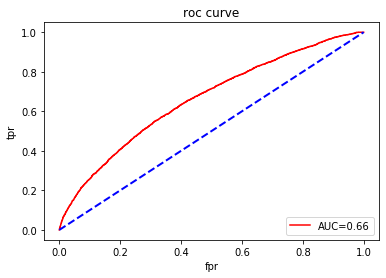

In [91]:
from sklearn.metrics import roc_curve,auc
probs2=xgb_opt.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [ ]:
# Naive Bayes Classifier

In [92]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train.todense(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
y_pred = model.predict(X_test.todense())

In [94]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
con_mat = confusion_matrix(y_test,y_pred, labels = labels)
print(con_mat)

[[ 3305   118]
 [25504  1603]]


In [97]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = model.predict(X_train.todense())
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.84      0.06      0.11     63302
           1       0.51      0.99      0.68     63302

    accuracy                           0.52    126604
   macro avg       0.68      0.52      0.40    126604
weighted avg       0.68      0.52      0.40    126604



In [98]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = xgb_opt.predict(X_test.todense())
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27107
           1       0.11      1.00      0.20      3423

    accuracy                           0.11     30530
   macro avg       0.06      0.50      0.10     30530
weighted avg       0.01      0.11      0.02     30530



C:\Users\RISHIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 16.08%


In [ ]:
# optimization

In [ ]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = nbc_opt.predict(X_train.todense())
print ('Report : ')
print (classification_report(actual, predicted))

In [ ]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = nbc_opt.predict(X_test.todense())
print ('Report : ')
print (classification_report(actual, predicted))

In [ ]:
from sklearn.metrics import roc_curve,auc
probs2=nbc_opt.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()